# Make Logbook of Trim images of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS, France
- date   : Jult 4th 2017



In [49]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [50]:
print(theNotebook)

MakeLogBook


In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [52]:
import pandas as pd

In [53]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Location of trim images
----------------------------------

In [54]:
rootpath_rawimage="../OverScanRemove/trim_images"
MIN_IMGNUMBER=144
MAX_IMGNUMBER=357
object_name='HD205905_Jun_08th'
SelectTagRe='^trim_20170608_([0-9]+).fits$' # regular expression to select the file
SearchTagRe='^trim_20170608_[0-9]+.fits$'
NBIMGPERLROW=4

In [55]:
#rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/November2016/mucol"
#object_name='mucol'
infos='ctio08jun2017'

In [56]:
logfile='logbk_'+object_name+'_'+infos+'.fits'
pandaslogfile='logbk_'+object_name+'_'+infos+'.csv'

In [57]:
dirlist=[]
dirlist.append(rootpath_rawimage)
dirlist_all=np.array(dirlist)

In [58]:
filelist_all=os.listdir(rootpath_rawimage) 

In [59]:
#dirlist_all.remove('.DS_Store') # reove that file in a mAC
filelist_all

['trim_20170608_001.fits',
 'trim_20170608_008.fits',
 'trim_20170608_012.fits',
 'trim_20170608_017.fits',
 'trim_20170608_020.fits',
 'trim_20170608_021.fits',
 'trim_20170608_023.fits',
 'trim_20170608_030.fits',
 'trim_20170608_046.fits',
 'trim_20170608_048.fits',
 'trim_20170608_057.fits',
 'trim_20170608_059.fits',
 'trim_20170608_060.fits',
 'trim_20170608_069.fits',
 'trim_20170608_075.fits',
 'trim_20170608_081.fits',
 'trim_20170608_091.fits',
 'trim_20170608_094.fits',
 'trim_20170608_096.fits',
 'trim_20170608_105.fits',
 'trim_20170608_115.fits',
 'trim_20170608_116.fits',
 'trim_20170608_123.fits',
 'trim_20170608_126.fits',
 'trim_20170608_128.fits',
 'trim_20170608_130.fits',
 'trim_20170608_131.fits',
 'trim_20170608_138.fits',
 'trim_20170608_139.fits',
 'trim_20170608_140.fits',
 'trim_20170608_143.fits',
 'trim_20170608_155.fits',
 'trim_20170608_159.fits',
 'trim_20170608_160.fits',
 'trim_20170608_161.fits',
 'trim_20170608_162.fits',
 'trim_20170608_165.fits',
 

In [60]:
indexes_files= [] # global list
filelist_fitsimages= []  # global list

In [61]:
def MakeFileList():
    """
    MakeFileList : Make The List of files to open
    =============
    
    - we select the files which are of interest.
    - In particular select the number range
    
    """
    count=0
    
    for dir in dirlist_all: # loop on directories, one per image   (if necessary)    
            dir_leaf= dir # build the name of leaf directory
            listfiles=os.listdir(dir_leaf) 
            for filename in listfiles:
                if re.search(SearchTagRe,filename):  #example of filename filter
                    str_index=re.findall(SelectTagRe,filename)
                    count=count+1
                    index=int(str_index[0])
                    if index >= MIN_IMGNUMBER and index <= MAX_IMGNUMBER: 
                        indexes_files.append(index)         
                        shortfilename=dir_leaf+'/'+filename
                        filelist_fitsimages.append(shortfilename)
                    
    return

In [62]:
MakeFileList()   # Make the list

In [63]:
indexes_files=np.array(indexes_files)
filelist_fitsimages=np.array(filelist_fitsimages)

In [64]:
indexes_files

array([155, 159, 160, 161, 162, 165, 167, 173, 176, 183, 185, 189, 190,
       193, 196, 197, 198, 209, 213, 215, 221, 226, 231, 242, 244, 246,
       247, 251, 254, 256, 258, 262, 263, 274, 275, 276, 283, 286, 289,
       296, 297, 298, 302, 318, 319, 321, 322, 323, 327, 336, 346, 348, 357])

In [65]:
sorted_indexes=np.argsort(indexes_files) # sort the file indexes

In [66]:
sorted_files=filelist_fitsimages[sorted_indexes]

In [67]:
sorted_numbers=indexes_files[sorted_indexes]

In [68]:
sorted_filenames=[]
for file in sorted_files:
    #fullfilename=os.path.join(rootpath_rawimage,file)
    fullfilename=file
    sorted_filenames.append(fullfilename)

In [69]:
sorted_filenames=np.array(sorted_filenames)

In [70]:
sorted_filenames

array(['../OverScanRemove/trim_images/trim_20170608_155.fits',
       '../OverScanRemove/trim_images/trim_20170608_159.fits',
       '../OverScanRemove/trim_images/trim_20170608_160.fits',
       '../OverScanRemove/trim_images/trim_20170608_161.fits',
       '../OverScanRemove/trim_images/trim_20170608_162.fits',
       '../OverScanRemove/trim_images/trim_20170608_165.fits',
       '../OverScanRemove/trim_images/trim_20170608_167.fits',
       '../OverScanRemove/trim_images/trim_20170608_173.fits',
       '../OverScanRemove/trim_images/trim_20170608_176.fits',
       '../OverScanRemove/trim_images/trim_20170608_183.fits',
       '../OverScanRemove/trim_images/trim_20170608_185.fits',
       '../OverScanRemove/trim_images/trim_20170608_189.fits',
       '../OverScanRemove/trim_images/trim_20170608_190.fits',
       '../OverScanRemove/trim_images/trim_20170608_193.fits',
       '../OverScanRemove/trim_images/trim_20170608_196.fits',
       '../OverScanRemove/trim_images/trim_20170608_197

In [71]:
from astropy.io import fits
with fits.open(sorted_filenames[0]) as pf:
    (pf[0].header)

In [72]:
pf[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBJECT  = 'HD205905'           / Name of object observed                        
OBSERVER= '        '           / observer                                       
PROPID  = '        '           / Proposal ID                                    
RECID   = 'ct36.20170609.062228' / NOAO Archibe record ID                       
PROPID  = '        '           / Proposal ID                                    
IMAGETYP= 'object  '        

### Build tables for output file

In [73]:
all_headers = []
all_dates = []
all_airmass = []
all_exposures = []
all_ut = []
all_ra = []
all_dec = []
all_epoch = []
all_zenith = []
all_ha = []
all_st = []
all_alt = []
all_focus = []
all_temp = []
all_press = []
all_hum = []
all_windsp = []
all_seeing = []
all_seeingam = []
all_filter1 = []
all_filter2 = []
all_object = []

for idx,file in np.ndenumerate(sorted_filenames):  
    print file
    hdu_list=fits.open(file)
    header=hdu_list[0].header
    date_obs = header['DATE-OBS']
    airmass = float(header['AIRMASS'])
    expo= float(header['EXPTIME'])
    num=indexes_files[idx[0]]
    obj=header['OBJECT']
   
    ut=header['UT']
    ra=header['RA']
    dec=header['DEC']
    epoch=float(header['EPOCH'])
    zd = float(header['ZD'])
    ha = header['HA']
    st = header['ST']
    alt = float(header['ALT'])
    fcl = float(header['TELFOCUS'])
    temp= float(header['OUTTEMP'])
    press= float(header['OUTPRESS'])
    hum= float(header['OUTHUM'])
    windsp=float(header['WNDSPEED'])
    seeing=float(header['SEEING'])
    seeingam=float(header['SAIRMASS'])
    filter1 = header['FILTER1']
    filter2 = header['FILTER2']
    
    all_dates.append(date_obs)
    all_airmass.append(airmass)
    all_headers.append(header)
    all_exposures.append(expo)
    all_ut.append(ut)
    all_ra.append(ra)
    all_dec.append(dec)
    all_epoch.append(epoch)
    all_zenith.append(zd)
    all_ha.append(ha)
    all_st.append(st)
    all_alt.append(alt)
    all_focus.append(fcl)
    all_temp.append(temp)
    all_press.append(press)
    all_hum.append(hum)
    all_windsp.append(windsp)
    all_seeing.append(seeing)
    all_seeingam.append(seeingam)
    all_filter1.append(filter1)
    all_filter2.append(filter2)
    all_object.append(obj)

    hdu_list.close()
    

../OverScanRemove/trim_images/trim_20170608_155.fits
../OverScanRemove/trim_images/trim_20170608_159.fits
../OverScanRemove/trim_images/trim_20170608_160.fits
../OverScanRemove/trim_images/trim_20170608_161.fits
../OverScanRemove/trim_images/trim_20170608_162.fits
../OverScanRemove/trim_images/trim_20170608_165.fits
../OverScanRemove/trim_images/trim_20170608_167.fits
../OverScanRemove/trim_images/trim_20170608_173.fits
../OverScanRemove/trim_images/trim_20170608_176.fits
../OverScanRemove/trim_images/trim_20170608_183.fits
../OverScanRemove/trim_images/trim_20170608_185.fits
../OverScanRemove/trim_images/trim_20170608_189.fits
../OverScanRemove/trim_images/trim_20170608_190.fits
../OverScanRemove/trim_images/trim_20170608_193.fits
../OverScanRemove/trim_images/trim_20170608_196.fits
../OverScanRemove/trim_images/trim_20170608_197.fits
../OverScanRemove/trim_images/trim_20170608_198.fits
../OverScanRemove/trim_images/trim_20170608_209.fits
../OverScanRemove/trim_images/trim_20170608_21

In [74]:
len(all_airmass)

53

In [75]:
all_filter1

['RG715',
 'RG715',
 'FGB37',
 'RG715',
 'FGB37',
 'RG715',
 'RG715',
 'RG715',
 'FGB37',
 'RG715',
 'RG715',
 'RG715',
 'FGB37',
 'RG715',
 'FGB37',
 'RG715',
 'FGB37',
 'RG715',
 'RG715',
 'RG715',
 'RG715',
 'FGB37',
 'RG715',
 'FGB37',
 'FGB37',
 'FGB37',
 'RG715',
 'RG715',
 'FGB37',
 'FGB37',
 'FGB37',
 'FGB37',
 'RG715',
 'FGB37',
 'RG715',
 'FGB37',
 'RG715',
 'FGB37',
 'RG715',
 'FGB37',
 'RG715',
 'FGB37',
 'FGB37',
 'FGB37',
 'RG715',
 'RG715',
 'FGB37',
 'RG715',
 'RG715',
 'FGB37',
 'FGB37',
 'FGB37',
 'RG715']

## Build outputfile

In [76]:
col_airmass=np.array(all_airmass)
col_number=np.array(indexes_files)
col_date=np.array(all_dates)
col_filename=np.array(filelist_all)
col_exposure=np.array(all_exposures)
col_zenith=np.array(all_zenith)
col_altitude=np.array(all_alt)
col_temperature=np.array(all_temp)
col_pressure=np.array(all_press)
col_humidity=np.array(all_hum)
col_windsp=np.array(all_windsp)
col_seeing=np.array(all_seeing)
col_filter1=np.array(all_filter1)
col_filter2=np.array(all_filter2)
col_obj=np.array(all_object)

In [77]:
c1 = fits.Column(name='number', format='J', array=col_number)
c2 = fits.Column(name='airmass', format='E', array=col_airmass)
c3 = fits.Column(name='date', format='A50', array=col_date)
c4 = fits.Column(name='filename', format='A30', array=sorted_filenames)
c5 = fits.Column(name='exposure', format='E', array=col_exposure) 
c6 = fits.Column(name='zenith', format='E', array=col_zenith) 
#c7 = fits.Column(name='altitude', format='E', array=col_altitude) 
c8 = fits.Column(name='temperature', format='E', array=col_temperature) 
c9 = fits.Column(name='pressure', format='E', array=col_pressure) 
c10 = fits.Column(name='humidity', format='E', array=col_humidity) 
c11 = fits.Column(name='windspeed', format='E', array=col_windsp) 
c12 = fits.Column(name='seeing', format='E', array=col_seeing) 
c13 = fits.Column(name='filter1', format='A20', array=col_filter1)
c14 = fits.Column(name='filter2', format='A20', array=col_filter2) 
c15 = fits.Column(name='object', format='A20', array=col_obj) 

In [78]:
tbhdu = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5,c6,c8,c9,c10,c11,c12,c13,c14,c15])

In [79]:
tbhdu.writeto(logfile,overwrite=True)

## Convert into Table
---------------------------

In [80]:
thetable= Table(tbhdu.data)

In [81]:
thetable.show_in_notebook()

idx,number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing,filter1,filter2,object
0,155,1.252,2017-06-09T06:22:28.198,../OverScanRemove/trim_images/,15.0,37.034,7.6,784.0,32.0,6.4,0.962,RG715,Ron200,HD205905
1,159,1.236,2017-06-09T06:27:05.648,../OverScanRemove/trim_images/,15.0,36.037,7.7,784.0,43.0,6.5,0.962,RG715,HoloPhP,HD205905
2,160,1.232,2017-06-09T06:28:15.158,../OverScanRemove/trim_images/,30.0,35.796,7.7,784.0,38.0,6.5,0.962,FGB37,HoloPhAg,HD205905
3,161,1.228,2017-06-09T06:29:39.401,../OverScanRemove/trim_images/,30.0,35.493,7.6,784.0,33.0,7.2,0.962,RG715,HoloPhAg,HD205905
4,162,1.223,2017-06-09T06:31:05.855,../OverScanRemove/trim_images/,30.0,35.182,7.7,784.0,32.0,6.9,0.962,FGB37,HoloAmAg,HD205905
5,165,1.21,2017-06-09T06:35:02.806,../OverScanRemove/trim_images/,15.0,34.323,7.7,784.0,32.0,5.1,0.962,RG715,Ron200,HD205905
6,167,1.203,2017-06-09T06:37:23.602,../OverScanRemove/trim_images/,15.0,33.816,7.6,783.0,32.0,11.4,0.962,RG715,Thor300,HD205905
7,173,1.181,2017-06-09T06:45:05.197,../OverScanRemove/trim_images/,30.0,32.163,7.5,784.0,32.0,11.5,0.962,RG715,HoloAmAg,HD205905
8,176,1.17,2017-06-09T06:48:51.355,../OverScanRemove/trim_images/,15.0,31.34,7.7,784.0,32.0,11.4,0.962,FGB37,Thor300,HD205905
9,183,1.148,2017-06-09T06:57:44.001,../OverScanRemove/trim_images/,30.0,29.427,7.7,784.0,32.0,8.3,0.962,RG715,HoloAmAg,HD205905


## Read the logfile into a Table
---------------------------------------

In [82]:
print logfile

logbk_HD205905_Jun_08th_ctio08jun2017.fits


In [83]:
t = Table.read(logfile)

In [84]:
t

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing,filter1,filter2,object
int32,float32,str50,str30,float32,float32,float32,float32,float32,float32,float32,str20,str20,str20
155,1.252,2017-06-09T06:22:28.198,../OverScanRemove/trim_images/,15.0,37.034,7.6,784.0,32.0,6.4,0.962,RG715,Ron200,HD205905
159,1.236,2017-06-09T06:27:05.648,../OverScanRemove/trim_images/,15.0,36.037,7.7,784.0,43.0,6.5,0.962,RG715,HoloPhP,HD205905
160,1.232,2017-06-09T06:28:15.158,../OverScanRemove/trim_images/,30.0,35.796,7.7,784.0,38.0,6.5,0.962,FGB37,HoloPhAg,HD205905
161,1.228,2017-06-09T06:29:39.401,../OverScanRemove/trim_images/,30.0,35.493,7.6,784.0,33.0,7.2,0.962,RG715,HoloPhAg,HD205905
162,1.223,2017-06-09T06:31:05.855,../OverScanRemove/trim_images/,30.0,35.182,7.7,784.0,32.0,6.9,0.962,FGB37,HoloAmAg,HD205905
165,1.21,2017-06-09T06:35:02.806,../OverScanRemove/trim_images/,15.0,34.323,7.7,784.0,32.0,5.1,0.962,RG715,Ron200,HD205905
167,1.203,2017-06-09T06:37:23.602,../OverScanRemove/trim_images/,15.0,33.816,7.6,783.0,32.0,11.4,0.962,RG715,Thor300,HD205905
173,1.181,2017-06-09T06:45:05.197,../OverScanRemove/trim_images/,30.0,32.163,7.5,784.0,32.0,11.5,0.962,RG715,HoloAmAg,HD205905
176,1.17,2017-06-09T06:48:51.355,../OverScanRemove/trim_images/,15.0,31.34,7.7,784.0,32.0,11.4,0.962,FGB37,Thor300,HD205905


## Convert into pandas to plot
---------------------------------------

In [85]:
df = t.to_pandas()

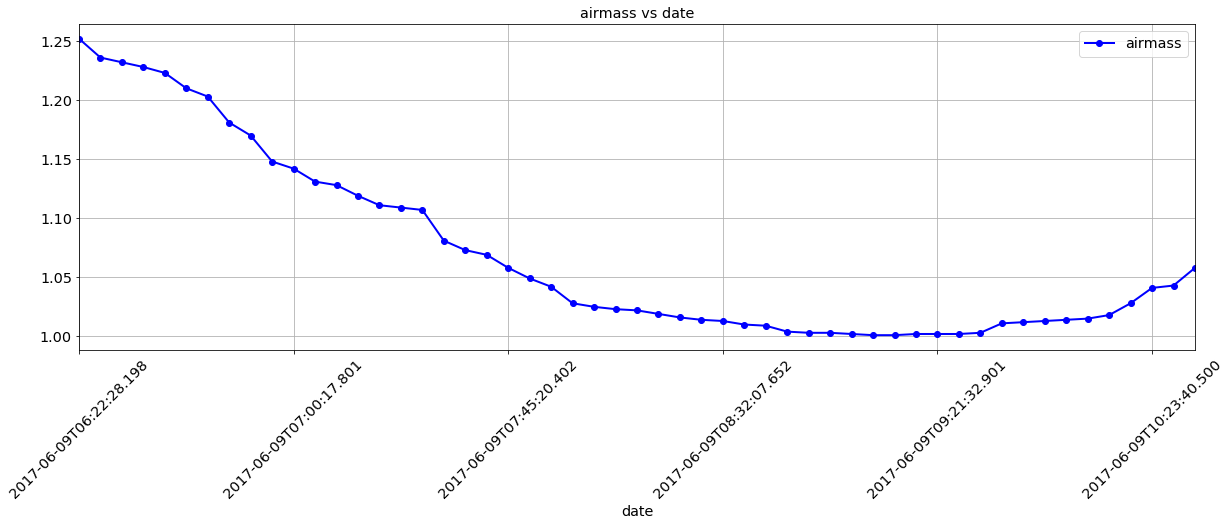

In [86]:
df.plot('date','airmass',figsize=(20,6),rot=45,grid=True,title='airmass vs date',color='b',marker='o',linewidth=2)


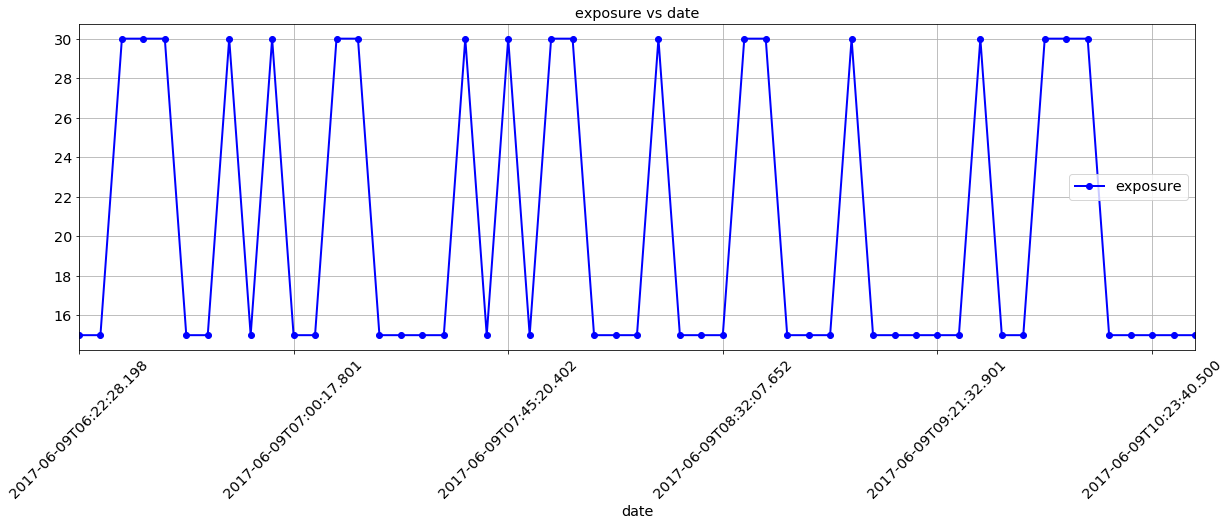

In [87]:
df.plot('date','exposure',figsize=(20,6),rot=45,grid=True,title='exposure vs date',color='b',marker='o',linewidth=2)

### Save pandas file


In [88]:
df.to_csv(pandaslogfile)